In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# TECHNIQUES_LIST = [
#         'bake', 'barbecue', 'blanch', 'blend', 'boil', 'braise', 'brine', 'broil',
#         'caramelize', 'combine', 'crock pot', 'crush', 'deglaze', 'devein', 'dice',
#         'distill', 'drain', 'emulsify', 'ferment', 'freeze', 'fry', 'grate', 'griddle',
#         'grill', 'knead', 'leaven', 'marinate', 'mash', 'melt', 'microwave', 'parboil',
#         'pickle', 'poach', 'pour', 'pressure cook', 'puree', 'refrigerate', 'roast', 'saute',
#         'scald', 'scramble', 'shred', 'simmer', 'skillet', 'slow cook', 'smoke', 'smooth',
#         'soak', 'sous-vide', 'steam', 'stew', 'strain', 'tenderize', 'thicken', 'toast',
#         'toss', 'whip', 'whisk'
#     ]

In [ ]:
TECHNIQUES_LIST = ['bake', 'boil', 'fry', 'grill', 'braise', 'roast', 'steam', 'stew', 'saute', 'marinate']

In [ ]:
keymap = {
    'bake': 'bake',
    'barbecue': 'grill',
    'blanch': 'boil',
    'blend': 'mix',
    'boil': 'boil',
    'braise': 'braise',
    'brine': 'marinate',
    'broil': 'broil',
    'caramelize': 'marinate',
    'combine': 'mix',
    'crock pot': 'slow cook',
    'crush': 'mix',
    'deglaze': 'boil',
    'devein': 'prep',
    'dice': 'prep',
    'distill': 'boil',
    'drain': 'prep',
    'emulsify': 'mix',
    'ferment': 'prep',
    'freeze': 'prep',
    'fry': 'fry',
    'grate': 'prep',
    'griddle': 'grill',
    'grill': 'grill',
    'knead': 'prep',
    'leaven': 'prep',
    'marinate': 'marinate',
    'mash': 'prep',
    'melt': 'prep',
    'microwave': 'cook',
    'parboil': 'boil',
    'pickle': 'prep',
    'poach': 'boil',
    'pour': 'prep',
    'pressure cook': 'boil',
    'puree': 'mix',
    'refrigerate': 'prep',
    'roast': 'roast',
    'saute': 'saute',
    'scald': 'boil',
    'scramble': 'mix',
    'shred': 'prep',
    'simmer': 'boil',
    'skillet': 'cook',
    'slow cook': 'cook',
    'smoke': 'prep',
    'smooth': 'mix',
    'soak': 'prep',
    'sous-vide': 'prep',
    'steam': 'steam',
    'stew': 'stew',
    'strain': 'prep',
    'tenderize': 'prep',
    'thicken': 'prep',
    'toast': 'prep',
    'toss': 'mix',
    'whip': 'mix',
    'whisk': 'mix'
}

In [18]:
# Define file paths
csv1_path = 'newdataset/RAW_recipes.csv'  # id,steps,ingredients, (name, minutes, n_steps, n_ingredients)
csv2_path = 'newdataset/RAW_interactions.csv'  # recipe_id, rating
csv3_path = 'newdataset/PP_recipes.csv'  # id, techniques

# Read CSV files, keeping only the specified columns
df1 = pd.read_csv(csv1_path, usecols=['id', 'steps', 'ingredients'])
df2 = pd.read_csv(csv2_path, usecols=['recipe_id', 'rating'])
df3 = pd.read_csv(csv3_path, usecols=['id', 'techniques'])

# Drop rows with NaN values from both dataframes
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Ensure 'rating' column in df2 is float
df2['rating'] = df2['rating'].astype(float)

# Calculate average rating and count of ratings for each recipe_id in df2
avg_ratings = df2.groupby('recipe_id')['rating'].agg(['mean', 'count']).reset_index()
avg_ratings.rename(columns={'mean': 'avg_rating', 'count': 'rating_count'}, inplace=True)

# Merge df1 with avg_ratings based on id from df1 and recipe_id from avg_ratings
merged_df = pd.merge(df1, avg_ratings, left_on='id', right_on='recipe_id', how='left')
# Merge df3 with merged_df based on id from df3 and id from merged_df
merged_df = pd.merge(merged_df, df3, left_on='id', right_on='id', how='left')

# Drop recipe_id column from merged_df
merged_df.drop(columns='recipe_id', inplace=True, errors='ignore')

# Drop duplicate rows in merged_df (if any)
merged_df.drop_duplicates(inplace=True)

# Drop rows with NaN values
merged_df.dropna(inplace=True)

# Convert rating_count to integer for clarity
merged_df['rating_count'] = merged_df['rating_count'].astype(int)

# Function to extract techniques from a string of text
def extract_techniques(text):
    techniques_found = []
    for technique in TECHNIQUES_LIST:
        if technique in text.lower():
            techniques_found.append(technique)
    return techniques_found

# Create new column 'techniques_list'
merged_df['techniques_list'] = merged_df['steps'].apply(extract_techniques)
merged_df.drop(columns='techniques', inplace=True)

# Display or further process the merged DataFrame as needed
print(merged_df.shape)  # Display shape of merged DataFrame
#print(merged_df.head())  # Display first few rows of merged DataFrame
#print(merged_df.iloc[0])  # Display details of the first row for inspection
for i in merged_df.iloc[0]:
    print(i)

(178265, 6)
137739
['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']
['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']
5.0
3
['bake', 'grate', 'melt']


In [19]:
# Calculate statistics: mode, median, mean of rating_count and avg_rating
rating_count_mode = merged_df['rating_count'].mode()[0]
rating_count_median = merged_df['rating_count'].median()
rating_count_mean = merged_df['rating_count'].mean()
rating_count_max = merged_df['rating_count'].max()
rating_count_min = merged_df['rating_count'].min()

avg_rating_mode = merged_df['avg_rating'].mode()[0]
avg_rating_median = merged_df['avg_rating'].median()
avg_rating_mean = merged_df['avg_rating'].mean()
avg_rating_max = merged_df['avg_rating'].max()
avg_rating_min = merged_df['avg_rating'].min()

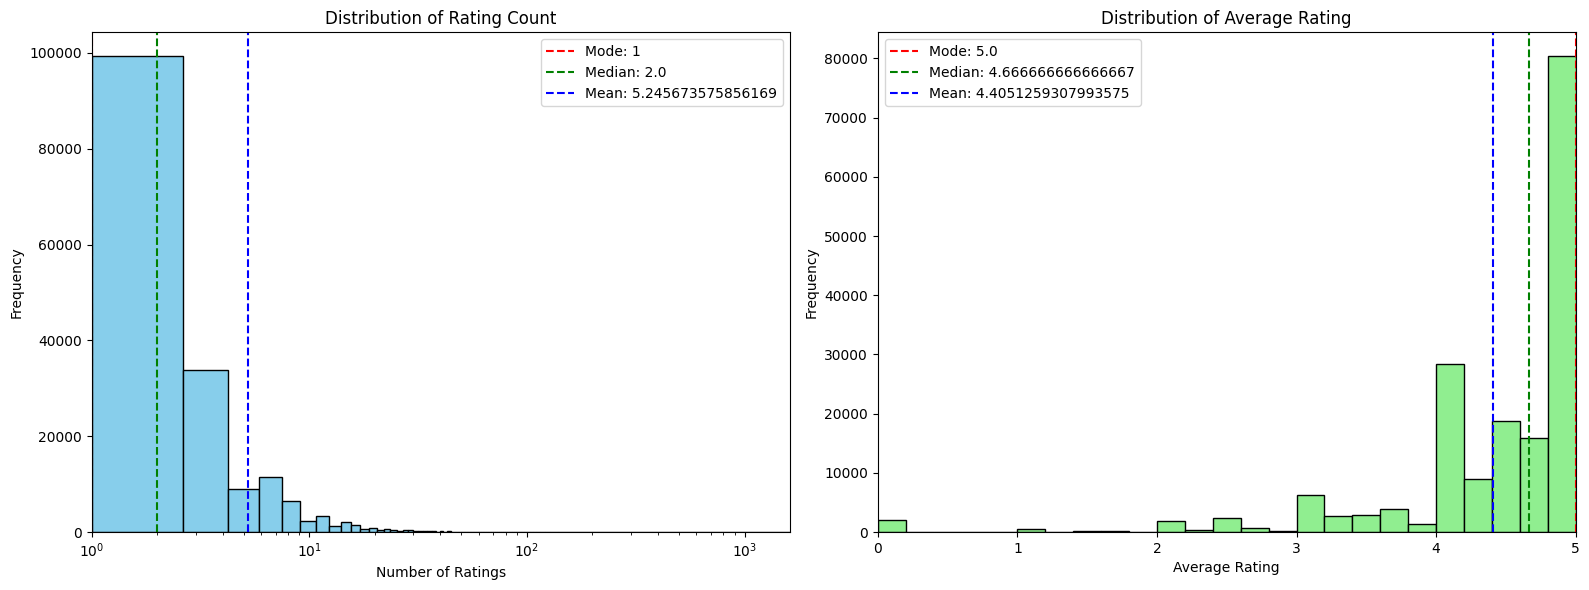

In [20]:
# Plotting
plt.figure(figsize=(16, 6))

# Plot for rating_count (with logarithmic scale)
plt.subplot(1, 2, 1)
plt.hist(merged_df['rating_count'], bins=1000, color='skyblue', edgecolor='black')
plt.axvline(x=rating_count_mode, color='r', linestyle='--', label=f'Mode: {rating_count_mode}')
plt.axvline(x=rating_count_median, color='g', linestyle='--', label=f'Median: {rating_count_median}')
plt.axvline(x=rating_count_mean, color='b', linestyle='--', label=f'Mean: {rating_count_mean}')
plt.title('Distribution of Rating Count')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.legend()
plt.xlim(left=rating_count_min, right=rating_count_max)  # Adjust if necessary

# Plot for avg_rating
plt.subplot(1, 2, 2)
plt.hist(merged_df['avg_rating'], bins=25, color='lightgreen', edgecolor='black')
plt.axvline(x=avg_rating_mode, color='r', linestyle='--', label=f'Mode: {avg_rating_mode}')
plt.axvline(x=avg_rating_median, color='g', linestyle='--', label=f'Median: {avg_rating_median}')
plt.axvline(x=avg_rating_mean, color='b', linestyle='--', label=f'Mean: {avg_rating_mean}')
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(left=avg_rating_min, right=avg_rating_max)

plt.tight_layout()
plt.show()

In [21]:
# Example: Write merged data to a new CSV file
merged_csv_path = 'newdataset/RAW_merged.csv'
merged_df.to_csv(merged_csv_path, index=False)

In [24]:
rating_df = merged_df[(merged_df['rating_count'] >= 20) & (merged_df['avg_rating'] >= 4.0)].copy()
print(rating_df.shape)  # Display shape of merged DataFrame

(6010, 6)


In [26]:
# Sort merged_df by avg_rating and rating_count in descending order to get the best recipes
rating_df.sort_values(by=['avg_rating', 'rating_count'], ascending=False, inplace=True)

# Select the top recipes based on your criteria (e.g., top 100 recipes)
top_recipes = rating_df.head(100000)
print(top_recipes.shape)  # Display shape of top_recipes DataFrame
print(top_recipes[['avg_rating', 'rating_count']])
# Example: Write merged data to a new CSV file
top_csv_path = 'newdataset/RAW_merged_top_smallest.csv'
top_recipes.to_csv(top_csv_path, index=False)

(6010, 6)
        avg_rating  rating_count
35255          5.0            52
21941          5.0            37
118005         5.0            36
124551         5.0            32
29819          5.0            31
...            ...           ...
175423         4.0            21
94             4.0            20
163551         4.0            20
180864         4.0            20
187564         4.0            20

[6010 rows x 2 columns]
